# Counting Meteors and Stars
First, the analyzed image is:

![meteor_stars](meteor_stars.png)

So, let's start couting the number of stars in the image!

In [51]:
# Importing all the necessay libs and packages
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

The number of stars in the image is: 315
The image with the detected stars:


(-0.5, 703.5, 703.5, -0.5)

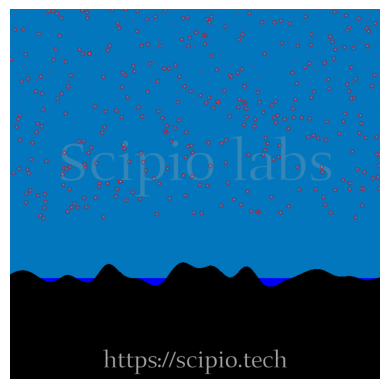

In [14]:
# Load the image
img = cv2.imread('meteor_stars.png')

# Grayscale to increase performance
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Count the number of starts
stars_count = np.sum(img_gray==255)
print(f'The number of stars in the image is: {stars_count}')

# Take the coordinates of the stars
stars_coord = np.where(img_gray==255)

# Zipping the coordinates
stars_coord_zip = zip(stars_coord[0], stars_coord[1])

# Print the coordinates of the stars in the image
for coord in stars_coord_zip:
    cv2.circle(img, (coord[1], coord[0]), 4, (0, 0, 255))

# Save the image with the detected stars
cv2.imwrite('stars_detected.png', img)

# Display it, correcting the colors to display
img_print = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('The image with the detected stars:')
plt.imshow(img_print)
plt.axis('off')

Now, let's count the number of meteors!

The number of meteors in the image is: 328
The image with the detected meteors:


(-0.5, 703.5, 703.5, -0.5)

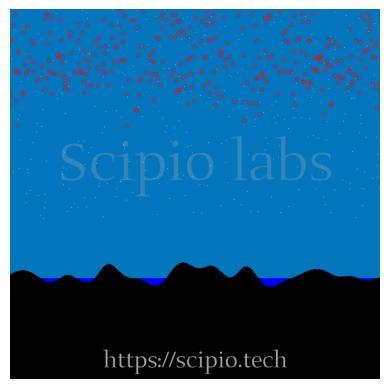

In [15]:
# Load the image
img = cv2.imread('meteor_stars.png')

# Define the red threshold for the meteors
lower_threshold  = (  0,   0, 200)
higher_threshold = (100, 100, 255)

# Create a mask to identify red pixels
mask = cv2.inRange(img, lower_threshold, higher_threshold)


# Realize the same process as did with the stars but using the meteors mask
meteor_count = np.sum(mask==255)
print(f'The number of meteors in the image is: {meteor_count}')
meteor_coord = np.where(mask==255)
meteor_coord_zip = zip(meteor_coord[0], meteor_coord[1])
# Print the coordinates of the stars in the image
for coord in meteor_coord_zip:
    cv2.circle(img, (coord[1], coord[0]), 4, (0, 0, 255))


# Save the image with the detected stars
cv2.imwrite('meteors_detected.png', img)

# Display it, correcting the colors to display
img_print = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('The image with the detected meteors:')
plt.imshow(img_print)
plt.axis('off')

Now, let's detected the meteors that are falling in the water. So we need to check the horizontal coordinates of the water and compare it with the horizontal coordinates of the meteros

The image with the detected water:


(-0.5, 703.5, 703.5, -0.5)

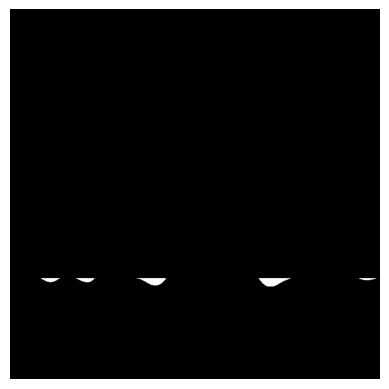

In [16]:
# First, let's take the water coordinates using the mask in the same way as used in the meteors
# Load the image
img = cv2.imread('meteor_stars.png')

# Define the red threshold for the water
lower_threshold  = (230,  0,  0)
higher_threshold = (255, 50, 50)

# Create a mask to identify water
mask_water = cv2.inRange(img, lower_threshold, higher_threshold)

# Display and save the mask to verify if the detection was accurate
cv2.imwrite('water_detected.png', mask_water)

# Display it, correcting the colors to display
img_print = cv2.cvtColor(mask_water, cv2.COLOR_BGR2RGB)
print('The image with the detected water:')
plt.imshow(img_print)
plt.axis('off')

Yes, it's very good! Let's take the distinct horizontal coordinates

In [18]:
# Take the water coordinates
water_coord = np.where(mask_water==255) 

# Select the distinct values(horizontal)
horizontal_water_coord = np.unique(water_coord[1])

# Select the values of meteor coordinates (horizontal)
horizontal_meteor_coord = meteor_coord[1]

# Count the values of meteor hitting the water (same coordinates)
meteor_water_count = np.sum(np.isin(horizontal_meteor_coord, horizontal_water_coord))
print(f'The number of meteors hitting the water is: {meteor_water_count}')


The number of meteors hitting the water is: 105


Now, let's detect the hidden phrase in the sky by creating a maks to detect the different blue color and using the pytesseract to convert it to string

The image with the detected text:


(-0.5, 703.5, 703.5, -0.5)

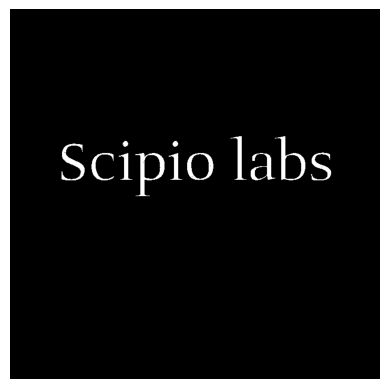

In [44]:
# Load the image
img = cv2.imread('meteor_stars.png')

# Define the red threshold for the water
lower_threshold  = ( 40,  90,  40)
higher_threshold = (200, 150, 80)

# Create a mask to identify water
mask_text = cv2.inRange(img, lower_threshold, higher_threshold)

# Display and save the mask to verify if the detection was accurate
cv2.imwrite('text_detected.png', mask_text)

# Display it, correcting the mask_text to display
img_print = cv2.cvtColor(mask_text, cv2.COLOR_BGR2RGB)
print('The image with the detected text:')
plt.imshow(img_print)
plt.axis('off')

In [52]:
#Taking the text from the image
hidden_text = pytesseract.image_to_string(mask_text, lang='eng')

#Print the result:
print(f'The hidden text in the image is: {hidden_text}')

TesseractNotFoundError: C:\Program Files\Tesseract-OCR\tesseract.exe is not installed or it's not in your PATH. See README file for more information.